## Understanding Sales Patterns and Customer Segmenation in an E-commerce Dataset


### Problem Statement
This project focuses on customer segmentation and understanding sales patterns in an e-commerce dataset. It aims to cluster customers based on purchasing behavior, such as spending, frequency, and product preferences, while also analyzing sales trends, including profit, discounts, and geographical patterns. By doing so, it provides insights that can help businesses optimize marketing strategies and improve sales performance

### Solution Approach 
1. Data Exploring/Inspection
2. Data Preprocessing
3. Feature Engineering
4. Feature Scaling
5. Target Variable Approach
6. Data Visualization
7. Customer Segmentation
8. Sales Pattern Analysis
9. Insights and Recommendations

### Importing Libraries


In [1]:
#importing all the neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans



### Importing Dataset

In [2]:
#load the dataset
df=pd.read_excel('E-Commerce.xls')


## 1.Data Exploration or Inspection

In [3]:
#shows top 5rows
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,22/8/2018,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08 00:00:00,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12 00:00:00,2018-06-16,2nd Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11 00:00:00,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11 00:00:00,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,NaN


In [4]:
#used to get the list of column names in a DataFrame
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### 1.1 Data Description
1. Row ID	     :- Unique identity of each row
2. Order ID	     :- Unique identity of each order
3. Order Date	 :- Date of the order placed
4. Ship Date	 :- Product shipped on which date
5. Ship Mode	 :- mode of shipping
6. Customer ID	 :- Unique identity of each customer
7. Customer Name :- Name of the customer	
8. Segment	     :- Customer belongs to Consumer or Corporate
9. Country/Region:-	Country of customer
10. City         :- City of customer
11. State        :- State of customer
12. Postal Code	 :- Postal code of customer
13. Region	     :- Region of the customer
14. Product ID	 :- Unique identity of each Product
15. Category	 :- Category of the product
16. Sub-Category :- Sub-Category of the product	
17. Product Name :- Name of the product	
18. Sales	     :- Price of the Product
19. Quantity	 :- No of products sold
20. Discount	 :- Percentage of discount offered on price
21. Profit       :- Profit earned on Product

In [5]:
#provides the dimensions of a DataFrame.
df.shape
print("No.of Rows are",df.shape[0])
print("No.of columnss are",df.shape[1])

No.of Rows are 9994
No.of columnss are 21


In [6]:
#no.of rows and columns,datatye of each column and non-null count,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   object        
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9964 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9963 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9968 non-null   object        
 15  Sub-

In [7]:
#to find the datatype of each columns
df.dtypes

Row ID                     int64
Order ID                  object
Order Date                object
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
dtype: object

In [8]:
# statistical summary of numerical columns
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9813.000000,9994.000000,9994.000000,9847.000000
mean,4997.500000,55245.233297,230.323015,3.789574,0.156203,28.754193
std,2885.163629,32038.715955,627.518545,2.225110,0.206452,235.696252
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.240000,2.000000,0.000000,1.703800
50%,4997.500000,57103.000000,54.224000,3.000000,0.200000,8.674400
75%,7495.750000,90008.000000,209.700000,5.000000,0.200000,29.447350
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#summary statistics for both categorical and numerical
df.describe(include='all')

C:\Users\lokesh\AppData\Local\Temp\ipykernel_23228\3026288906.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9964,9994,9994,...,9983.000000,9994,9994,9968,9994,9994,9813.000000,9994.000000,9994.000000,9847.000000
unique,NaN,5004,1242,1334,6,793,793,3,2,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2019-140088,2018-09-05 00:00:00,2017-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,16,38,35,5965,37,37,5173,9978,915,...,NaN,3203,19,6007,1523,48,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2016-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2020-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55245.233297,NaN,NaN,NaN,NaN,NaN,230.323015,3.789574,0.156203,28.754193
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32038.715955,NaN,NaN,NaN,NaN,NaN,627.518545,2.225110,0.206452,235.696252
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.240000,2.000000,0.000000,1.703800


## 2. Data Cleaning & Pre Processing

### 2.1.Handling Outliers or Extreme Values<br>
Methods to detect:
1. Z-Score: Data points with a Z-score greater than 3 or less than -3 are often considered as outliers.(when data is normally distributed)(sensitivie to outliers)<br>
Z=(x-mu)/Sigma<br>
where,<br>
x=Data points,<br>
mu=mean ,<br>
sigma= standard deviation<br>
2. IQR(Inter Quartile Range): Data points than fall below Q1-1.5IQR or above Q3+1.5IQR<br>
IQR=Q3-Q1<br>
LoweBound=Q1-1.5IQR<br>
UpperBound=Q3+1.5IQR<br>

3. Visualization: Use box plots,Scatter plots or histograms to visually detect outliers<br>
Methods to remove:<br>
1 remove----df_cleaned = df[~df['outliers']]<br>
2 log-----df['column'] = df['column'].apply(lambda x: np.log(x + 1))<br>
3 sqrt----df['column'] = np.sqrt(df['column'])


In [10]:
# Calculate Z-scores for each column
z_scores_sales = stats.zscore(df['Sales'])
z_scores_discount = stats.zscore(df['Discount'])
z_scores_profit = stats.zscore(df['Profit'])

# Create outlier columns based on Z-scores
df['Sales_outlier'] =( z_scores_sales > 3) |( z_scores_sales <- 3)
df['Discount_outlier'] = abs(z_scores_discount) > 3
df['Profit_outlier'] = abs(z_scores_profit) > 3

In [11]:
#with IQR method
Q1=df['Sales'].quantile(0.25)
Q3=df['Sales'].quantile(0.75)
IQR=Q3-Q1
df['outliers'] = (df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))

In [12]:
q1=df['Discount'].quantile(0.25)
q3=df['Discount'].quantile(0.75)
iqr=q3-q1
df['outliers1']=(df['Discount'] < (q1- 1.5*iqr)) | (df['Discount']>(q3+1.5*iqr))

<AxesSubplot:xlabel='Discount'>

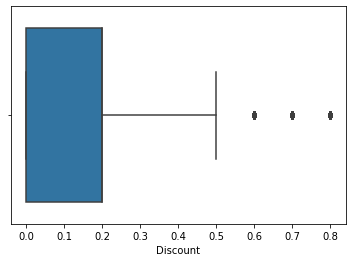

In [13]:
#with visualisation
sns.boxplot(x=df['Discount'])



<AxesSubplot:xlabel='Sales'>

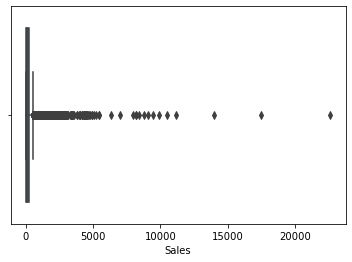

In [14]:
#outlier checkingwith visualisation
sns.boxplot(x=df['Sales'])

<AxesSubplot:xlabel='Profit'>

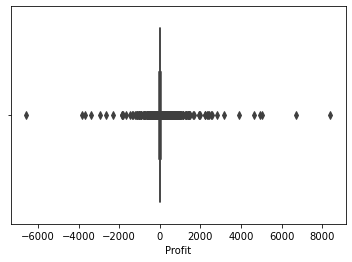

In [15]:
#outlier checkingwith visualisation
sns.boxplot(x=df['Profit'])

### 2.2.Handling Null Values or Missing Values<br>
 Methods:<br>
 1. Dropping Rows with null values if less percentage
 2. Imputation with Mean,Median for Numerical data and with mode if categorical data
 3. Dropping columns if percentage is more
 4. forward fill and backward fill for certain ML models

In [16]:
#to detect missing values in a DataFrame
df.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product Name,Sales,Quantity,Discount,Profit,Sales_outlier,Discount_outlier,Profit_outlier,outliers,outliers1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#to count the number of missing (null) values in each column of a DataFrame
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment              30
Country/Region        0
City                  0
State                31
Postal Code          11
Region                0
Product ID            0
Category             26
Sub-Category          0
Product Name          0
Sales               181
Quantity              0
Discount              0
Profit              147
Sales_outlier         0
Discount_outlier      0
Profit_outlier        0
outliers              0
outliers1             0
dtype: int64

In [18]:
#to calculate the percentage of missing values in each column of a DataFrame
(df.isnull().sum()*100)/len(df)

Row ID              0.000000
Order ID            0.000000
Order Date          0.000000
Ship Date           0.000000
Ship Mode           0.000000
Customer ID         0.000000
Customer Name       0.000000
Segment             0.300180
Country/Region      0.000000
City                0.000000
State               0.310186
Postal Code         0.110066
Region              0.000000
Product ID          0.000000
Category            0.260156
Sub-Category        0.000000
Product Name        0.000000
Sales               1.811087
Quantity            0.000000
Discount            0.000000
Profit              1.470883
Sales_outlier       0.000000
Discount_outlier    0.000000
Profit_outlier      0.000000
outliers            0.000000
outliers1           0.000000
dtype: float64

In [19]:
# Drop rows where 'Postal code' is null, but keep other rows with nulls in other columns
df = df.dropna(subset=['Postal Code'])


In [20]:
#check whether null values are deleted or not
print("Null values in Postal Code :",df['Postal Code'].isna().sum())
print("No.of rows reduced to:",df.shape[0])

Null values in Postal Code : 0
No.of rows reduced to: 9983


In [21]:
#calculating mode
print(df['Segment'].value_counts())
print("Mode of Segment:",df['Segment'].mode())
print("Mode of Segment:",df['Segment'].mode())

Consumer       5168
Corporate      3007
Home Office    1778
Name: Segment, dtype: int64
Mode of Segment: 0    Consumer
Name: Segment, dtype: object
Mode of Segment: 0    Consumer
Name: Segment, dtype: object


In [22]:
#Imputation of null values in categorical variables with Mode
#inplace= ensures that the changes are made directly to the DataFrame without needing to assign it back.

df['Segment'].fillna(df['Segment'].mode()[0],inplace=True) 
df['State'].fillna(df['State'].mode()[0],inplace=True) 
df['Category'].fillna(df['Category'].mode()[0],inplace=True) 

In [23]:
#check whether the values are imputated or not 
df[['Segment','State']].isnull().sum()

Segment    0
State      0
dtype: int64

In [24]:
# for numerical :
# 1.Mean----- symmetrical or normally distributed, no outliers
# 2. Median--- skewed or non-normal distribution, outliers are there.


In [25]:

print(df['Discount'].median())
print(df['Sales'].median())
print(df['Profit'].median())

0.2
54.208
8.6733


In [26]:
#imputation with median
df['Profit']=df['Profit'].fillna(8.6733)
df['Sales']=df['Sales'].fillna(54.208)
df['Discount']=df['Discount'].fillna(0.2)

In [27]:
df.isnull().sum() #final confirmation of null values

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country/Region      0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Sales_outlier       0
Discount_outlier    0
Profit_outlier      0
outliers            0
outliers1           0
dtype: int64

### 2.3 Handling Inconsistent Data Values

In [28]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product Name,Sales,Quantity,Discount,Profit,Sales_outlier,Discount_outlier,Profit_outlier,outliers,outliers1
0,1,CA-2018-152156,22/8/2018,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,False,False,False,False,False
1,2,CA-2018-152156,2018-11-08 00:00:00,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,False,False,False,True,False
2,3,CA-2018-138688,2018-06-12 00:00:00,2018-06-16,2nd Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,False,False,False,False,False
3,4,US-2017-108966,2017-10-11 00:00:00,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False,False,False,True,False
4,5,US-2017-108966,2017-10-11 00:00:00,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,8.6733,False,False,False,False,False
5,6,CA-2016-115812,2016-06-09 00:00:00,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,US,Los Angeles,...,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,False,False,False,False,False
6,7,CA-2016-115812,2016-06-09 00:00:00,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,US,Los Angeles,...,Newell 322,54.2080,4,0.00,1.9656,False,False,False,False,False
7,8,CA-2016-115812,24/9/2016,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,US,Los Angeles,...,Mitel 5320 IP Phone VoIP phone,54.2080,6,0.20,90.7152,False,False,False,False,False
8,9,CA-2016-115812,2016-06-09 00:00:00,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,US,Los Angeles,...,DXL Angle-View Binders with Locking Rings by S...,54.2080,3,0.20,5.7825,False,False,False,False,False
9,10,CA-2016-115812,2016-06-09 00:00:00,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,US,Los Angeles,...,Belkin F5C206VTEL 6 Outlet Surge,54.2080,5,0.00,34.4700,False,False,False,False,False


In [29]:
#checking all possible values for inconsistent data values
df['Country/Region'].value_counts()
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1939
First Class       1531
Same Day           543
1st Class           10
2nd Class            5
Name: Ship Mode, dtype: int64

In [30]:
#unique values from the columns to check inconsistent values
print(df['Country/Region'].unique())
print(df['Ship Mode'].unique())
print(df['Segment'].unique())


['United States' 'US']
['Second Class' '2nd Class' 'Standard Class' '1st Class' 'First Class'
 'Same Day']
['Consumer' 'Corporate' 'Home Office']


In [31]:
#replacing the inconsistent values 
df['Country/Region'] = df['Country/Region'].replace(['U.S.', 'USA','US'], 'United States')
df['Ship Mode'] = df['Ship Mode'].replace(['1st Class', '2nd Class'], ['First Class','Second Class'])

In [32]:
#checking for changed values
print(df['Country/Region'].unique())
print(df['Ship Mode'].unique())

['United States']
['Second Class' 'Standard Class' 'First Class' 'Same Day']


### 2.4 Handling Inconsistent Data Formats

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [34]:
df=df.dropna()

In [35]:

# Convert 'Order Date' to datetime, handling errors
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check the datatype to confirm it's been converted
print(df['Order Date'].dtype)

# Now extract day, month, and year
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

datetime64[ns]


In [36]:
df[['Order Day','Order Month','Order Year']].astype(int)

,Order Day,Order Month,Order Year
0,22,8,2018
1,8,11,2018
2,12,6,2018
3,11,10,2017
4,11,10,2017
...,...,...,...
9989,21,1,2016
9990,26,2,2019
9991,26,2,2019
9992,26,2,2019


### 2.5 Handling Duplicate Rows

In [37]:
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country/Region, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Sales_outlier, Discount_outlier, Profit_outlier, outliers, outliers1, Order Day, Order Month, Order Year]
Index: []

[0 rows x 29 columns]


 ### 2.6 Irrelevant Columns


In [38]:
# deleting  columns that are useless
df = df.drop(columns=['Sales_outlier', 'Discount_outlier','Profit_outlier','outliers','outliers1'])

In [39]:
#checking the columns deleted or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9982 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9982 non-null   int64         
 1   Order ID        9982 non-null   object        
 2   Order Date      9982 non-null   datetime64[ns]
 3   Ship Date       9982 non-null   datetime64[ns]
 4   Ship Mode       9982 non-null   object        
 5   Customer ID     9982 non-null   object        
 6   Customer Name   9982 non-null   object        
 7   Segment         9982 non-null   object        
 8   Country/Region  9982 non-null   object        
 9   City            9982 non-null   object        
 10  State           9982 non-null   object        
 11  Postal Code     9982 non-null   float64       
 12  Region          9982 non-null   object        
 13  Product ID      9982 non-null   object        
 14  Category        9982 non-null   object        
 15  Sub-

# 3. Feature Engineering
Feature engineering is the process of <b>selecting, manipulating and transforming raw data</b> into <b>meaningful and useful features</b> that can improve the performance of machine learning models. It involves <b>creating new variables, modifying existing ones, or selecting the most relevant features </b>from the dataset.

### 3.1 Customer-Level Features (RFM Analysis):
        1.Recency
        2.Frequency
        3.Monetary Value

In [40]:
#Recency: How recently a customer made a purchase. Calculate the days since their last purchase.
df['Recency'] = (df['Order Date'].max() - df['Order Date']).dt.days


In [41]:
#Frequency: Number of purchases made by each customer.
df['Frequency'] = df.groupby('Customer ID')['Order ID'].transform('count')


In [42]:
#Monetary Value: Total spending by each customer.
df['Monetary'] = df.groupby('Customer ID')['Sales'].transform('sum')


### 3.2  Geographical Features:
        1.Region-based Spending
        2.One-Hot Encoding for Location

In [43]:
#Region-based Spending: Calculate total sales by geographical region or city
df['Region_Spend'] = df.groupby('Country/Region')['Sales'].transform('sum')


In [44]:
# One-Hot Encoding for Location: Convert Country/Region and City to one-hot encoded variables.
df = pd.get_dummies(df, columns=['Country/Region', 'City'])


### 3.3 Customer-Level Profitability Metrics:
        1.Profit per Customer

In [45]:
#Profit per Customer: Total profit generated by each customer.
df['Profit_Per_Customer'] = df.groupby('Customer ID')['Profit'].transform('sum')


### 3.4 Discount-Related Features:
        1.Average Discount

In [46]:
#Average Discount: Calculate the average discount each customer receives.
df['Avg_Discount'] = df.groupby('Customer ID')['Discount'].transform('mean')


# 4. Feature Scaling
Feature scaling is the process of <b>normalizing or standardizing</b> the values of <b>numeric features</b>(Independent Variables) in a dataset so that they have a <b>consistent scale</b>.<br>
<b>1. Min-Max Scaling (Normalization): </b><br>
  Scales the data into a fixed range, typically [0,1].<br>
         X[scaled]= (X - X(min))/(Xmax-Xmin)<br>
  Useful when you need to ensure that all features are on the same scale.
  <br>
    
<b>2. Standardization (Z-Score Scaling):</b><br>
 Scales the data by removing the mean and dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.<br>
         X[scaled]=(x-mu)/sigma<br>
  Useful when the data follows a Gaussian distribution or when you want to preserve outliers.

In [47]:

# Select the numerical features to scale
numerical_features = ['Sales', 'Quantity', 'Profit', 'Discount']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled data to verify
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,State,Postal Code,...,City_Woodbury,City_Woodland,City_Woodstock,City_Woonsocket,City_Yonkers,City_York,City_Yucaipa,City_Yuma,Profit_Per_Customer,Avg_Discount
0,1,CA-2018-152156,2018-08-22,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,42420.0,...,0,0,0,0,0,0,0,0,169.9344,0.200000
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,42420.0,...,0,0,0,0,0,0,0,0,169.9344,0.200000
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,California,90036.0,...,0,0,0,0,0,0,0,0,-427.1840,0.172222
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,33311.0,...,0,0,0,0,0,0,0,0,-134.5888,0.136667
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,33311.0,...,0,0,0,0,0,0,0,0,-134.5888,0.136667


# 5. Target Variable
 <b>1. Customer Segmentation:</b> No target variable, as it’s an unsupervised task.<br>
 <b>2. Sales Patterns: </b>The target variable would be Sales, Profit, which we are interested in predicting or analyzing.

# 6. Data Visualization

##   6.1 Univariate Analysis

### For Numerical Variables

#### 6.1.1. Histograms
For continuous/numeric columns:
Sales;
Quantity;
Discount;
Profit;
Postal Code;
Order Day;
Order Month;
Order Year;

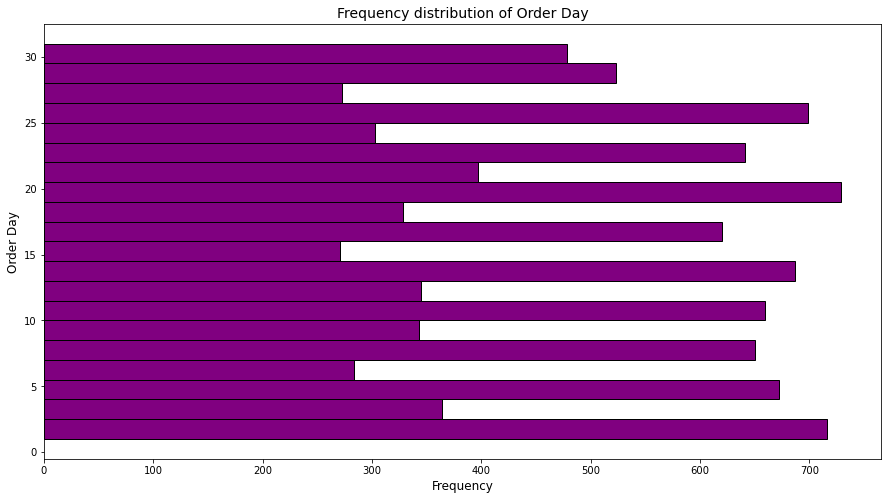

In [48]:
# Plotting the histogram for Order Day
plt.figure(figsize=(15, 8))
plt.hist(df['Order Day'], bins=20, color='purple', edgecolor='black',orientation='horizontal')
plt.title('Frequency distribution of Order Day', fontsize=14)
plt.ylabel('Order Day', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

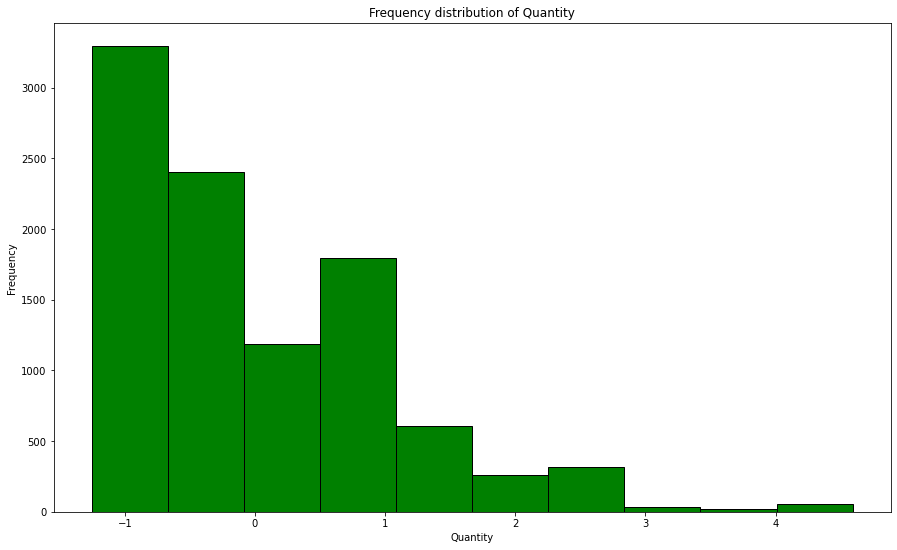

In [49]:

plt.figure(figsize=(15, 9))

# Creating histogram 
n, bins, patches = plt.hist(df['Quantity'], bins=10, color='Green', edgecolor='black')
plt.title('Frequency distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


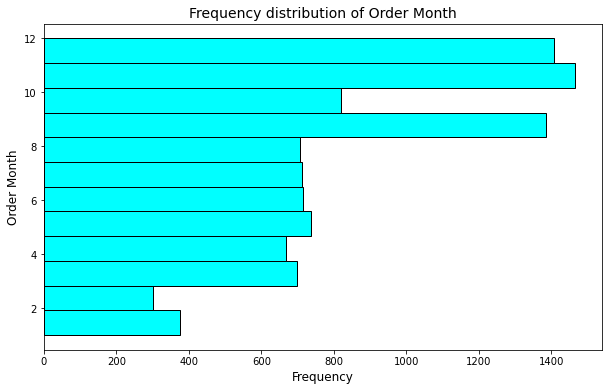

In [50]:
# Plotting the  histogram for Order Month
plt.figure(figsize=(10, 6))
plt.hist(df['Order Month'], bins=12, color='cyan', edgecolor='black', orientation='horizontal')
plt.title('Frequency distribution of Order Month', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Order Month', fontsize=12)
plt.show()

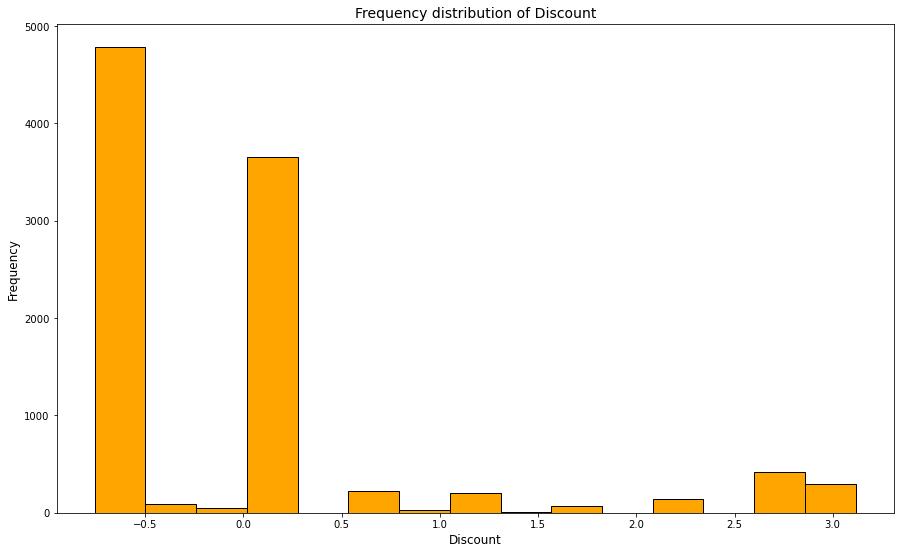

In [51]:
#for discount
plt.figure(figsize=(15, 9))
plt.hist(df['Discount'], bins=15, color='orange', edgecolor='black')
plt.title('Frequency distribution of Discount', fontsize=14)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

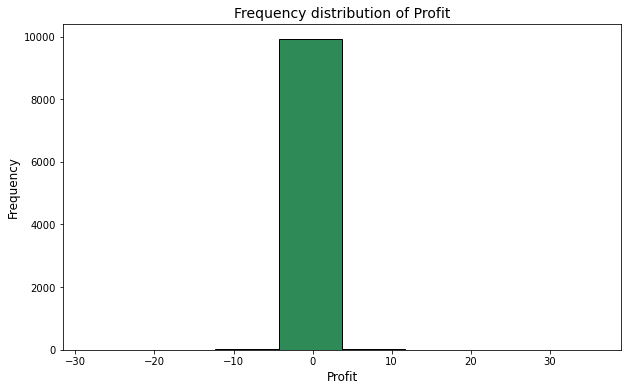

In [52]:
# Plotting the histogram for Profit
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=8, color='seagreen', edgecolor='black')
plt.title('Frequency distribution of Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


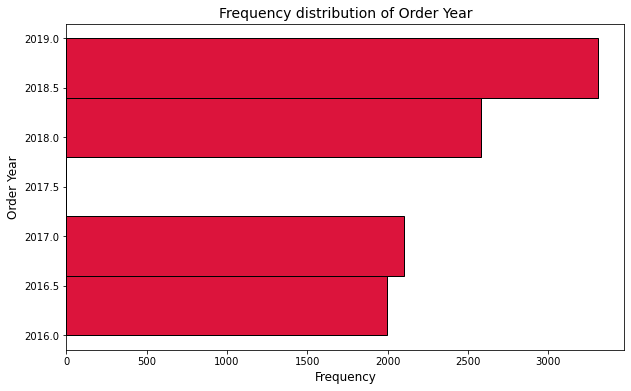

In [53]:
# Plotting the horizontal histogram for Order Year
plt.figure(figsize=(10, 6))
plt.hist(df['Order Year'], bins=5, color='crimson', edgecolor='black', orientation='horizontal')
plt.title('Frequency distribution of Order Year', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Order Year', fontsize=12)
plt.show()

#### 6.1.2 Box Plot
Shows the distribution of numerical data and highlights outliers.<br>
Useful for:<br>
1. Sales
2. Quantity
3. Discount
4. Profit

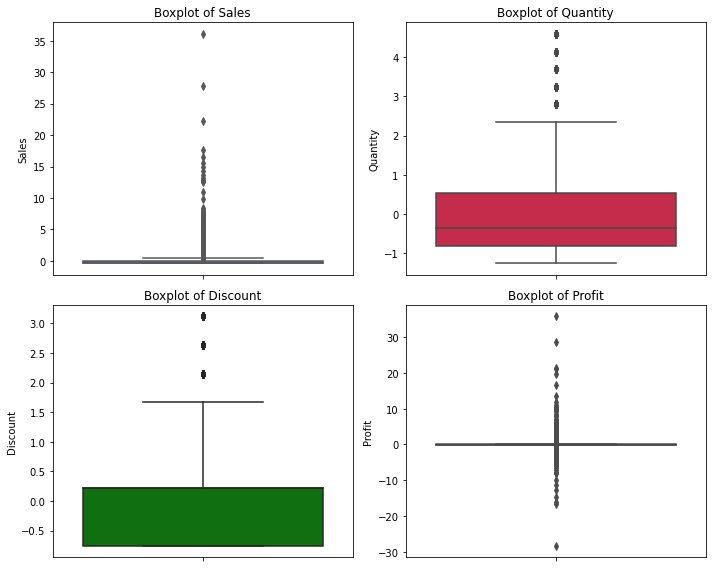

In [54]:

import matplotlib.pyplot as plt
# Create a figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for Sales
sns.boxplot(data=df, y='Sales', ax=axes[0, 0], color='royalblue')
axes[0, 0].set_title('Boxplot of Sales')

# Boxplot for Quantity
sns.boxplot(data=df, y='Quantity', ax=axes[0, 1], color='crimson')
axes[0, 1].set_title('Boxplot of Quantity')

# Boxplot for Discount
sns.boxplot(data=df, y='Discount', ax=axes[1, 0], color='Green')
axes[1, 0].set_title('Boxplot of Discount')

# Boxplot for Profit
sns.boxplot(data=df, y='Profit', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Boxplot of Profit')

# Adjust layout
plt.tight_layout()
plt.show()

#### 6.1.3 Kernel Density Estimation Plot(KDE)<br>
Shows the distribution of data across a continuous range. <br>
Useful for:<br>
1. Sales
2. Quantity
3. Discount
4. Profit

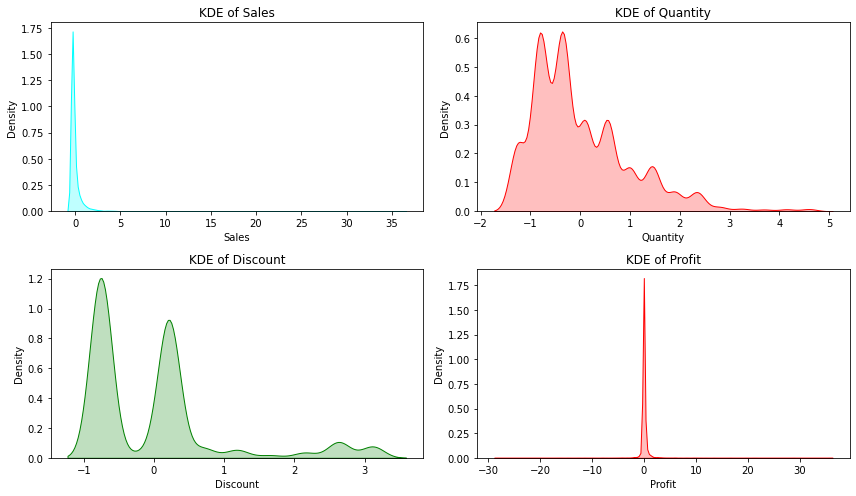

In [55]:
# KDE Plot for Numerical Columns
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# KDE for Sales
sns.kdeplot(data=df['Sales'], ax=axes[0, 0], shade=True, color='cyan')
axes[0, 0].set_title('KDE of Sales')

# KDE for Quantity
sns.kdeplot(data=df['Quantity'], ax=axes[0, 1], shade=True, color='red')
axes[0, 1].set_title('KDE of Quantity')

# KDE for Discount
sns.kdeplot(data=df['Discount'], ax=axes[1, 0], shade=True, color='green')
axes[1, 0].set_title('KDE of Discount')

# KDE for Profit
sns.kdeplot(data=df['Profit'], ax=axes[1, 1], shade=True, color='red')
axes[1, 1].set_title('KDE of Profit')

# Adjust layout
plt.tight_layout()
plt.show()


#### 6.1.4. Violin Plot<br>
Combines the box plot and density plot, showing the distribution of the data.<br>
Useful for:<br>
1. Sales
2. Quantity
3. Discount
4. Profit
    

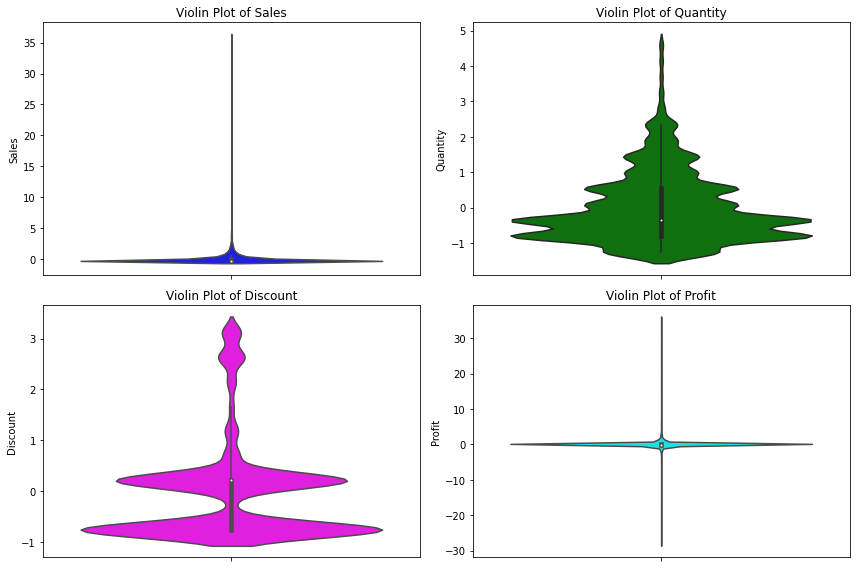

In [56]:
# Violin Plot for Numerical Columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Violin plot for Sales
sns.violinplot(data=df, y='Sales', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Violin Plot of Sales')

# Violin plot for Quantity
sns.violinplot(data=df, y='Quantity', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Violin Plot of Quantity')

# Violin plot for Discount
sns.violinplot(data=df, y='Discount', ax=axes[1, 0], color='magenta')
axes[1, 0].set_title('Violin Plot of Discount')

# Violin plot for Profit
sns.violinplot(data=df, y='Profit', ax=axes[1, 1], color='cyan')
axes[1, 1].set_title('Violin Plot of Profit')

# Adjust layout
plt.tight_layout()
plt.show()


### For Categorical Variables

#### Unordered categorical Data --- Nominal
Count of Variables which doesnt have any intrinsic order<br>
Ship Mode<br>
Segment<br>
Country/Region<br>
City<br>
Product Name<br>

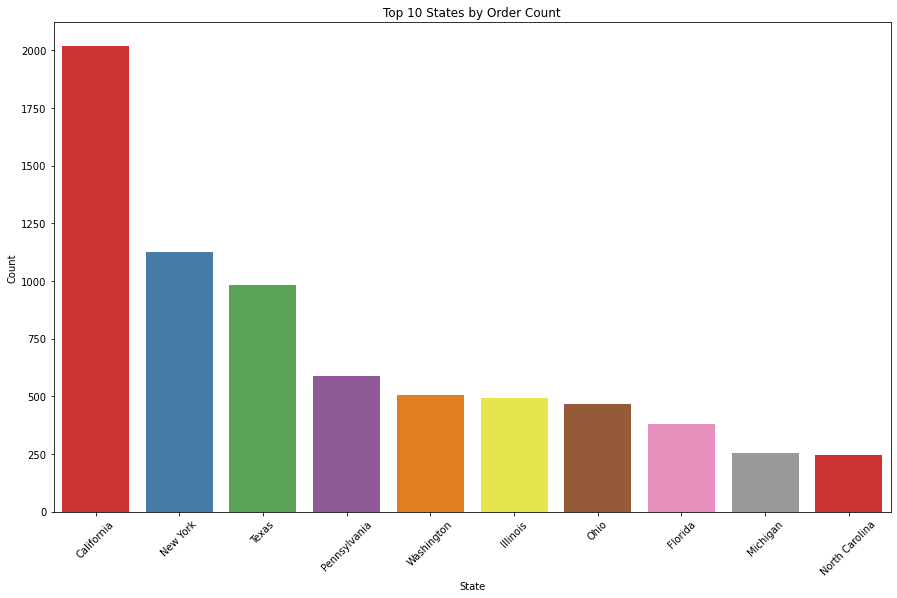

In [57]:
# Get top 10 states by order count
top_states = df['State'].value_counts().nlargest(10).index
    
# Create the plot
plt.figure(figsize=(15, 9))
sns.countplot(data=df[df['State'].isin(top_states)], x='State', palette='Set1', order=top_states)
    
# Title and labels
plt.title('Top 10 States by Order Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
    
# Show plot
plt.show()

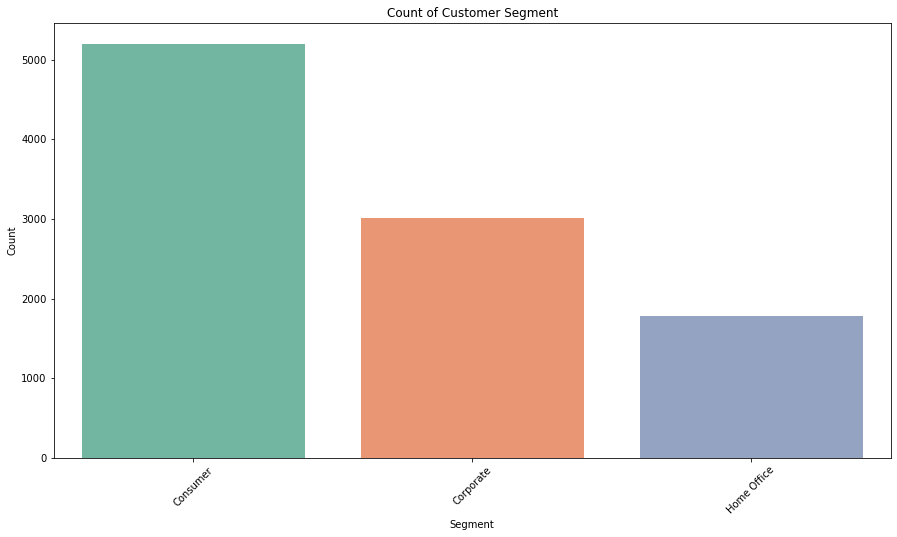

In [58]:
# Bar Chart for Segment
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Segment', palette='Set2')
plt.title('Count of Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


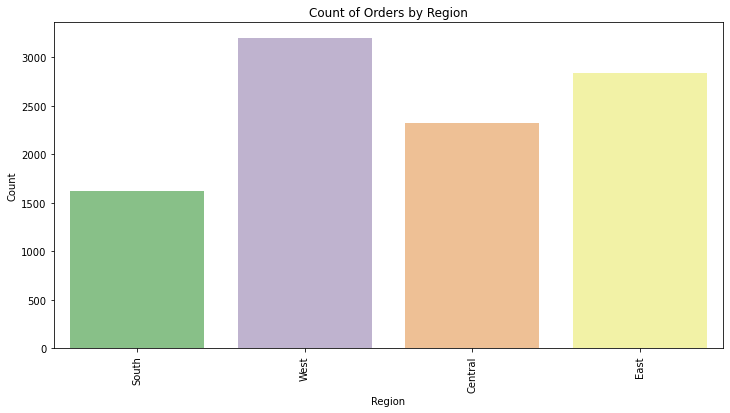

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', palette='Accent')
    
# Title and labels
plt.title('Count of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
    
# Rotate x-ticks for better readability
plt.xticks(rotation=90)
    
# Show plot
plt.show()


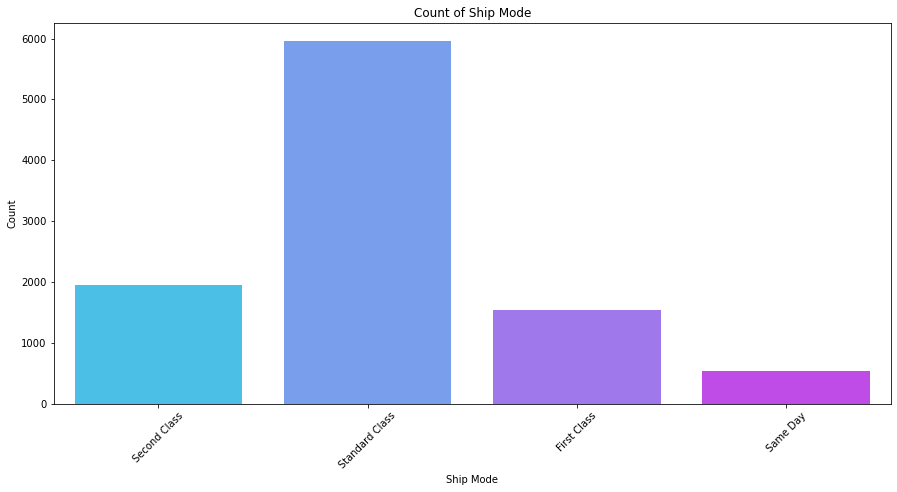

In [60]:
# Bar Chart for Ship Mode
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Ship Mode', palette='cool')
plt.title('Count of Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


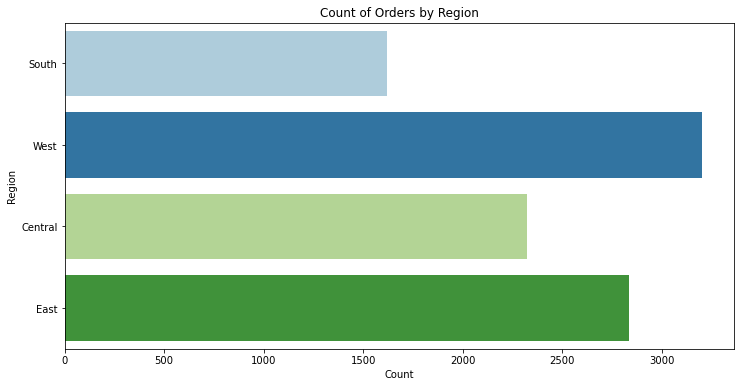

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Region', palette='Paired') 
plt.title('Count of Orders by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


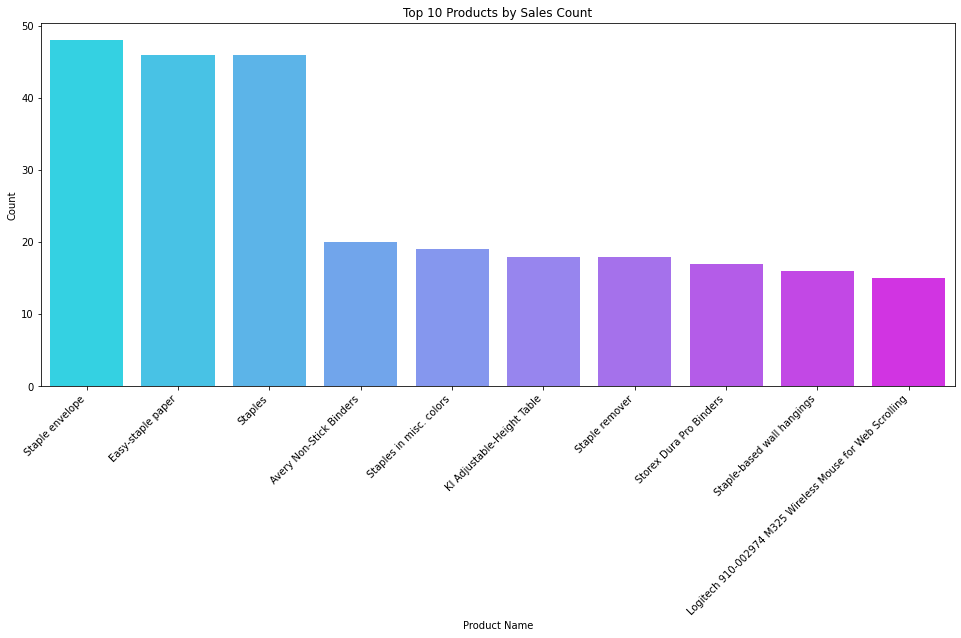

In [62]:
# Bar Chart for Product Name (Top 10 Products by Sales Count)
top_products = df['Product Name'].value_counts().nlargest(10).index


plt.figure(figsize=(15, 6)) 
sns.countplot(data=df[df['Product Name'].isin(top_products)], x='Product Name', palette='cool', order=top_products)

plt.title('Top 10 Products by Sales Count')
plt.xlabel('Product Name')
plt.ylabel('Count')

plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' for horizontal alignment of labels

plt.show()


#### 3.1.6. Pie Charts
Shows the proportion of each category as a part of the whole. <br>
Useful for:<br>
Ship Mode<br>
Segment<br>
Region<br>
Category

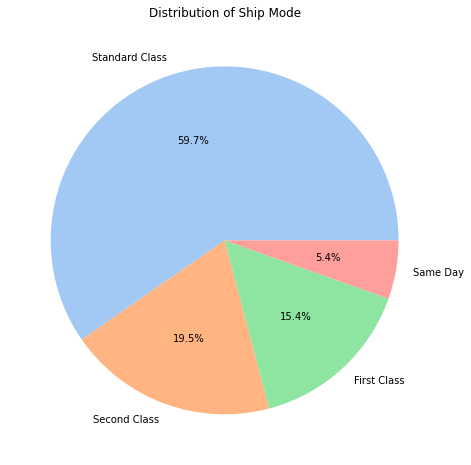

In [63]:
# Pie Chart for Ship Mode
plt.figure(figsize=(8, 8))
ship_mode_counts = df['Ship Mode'].value_counts()
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Ship Mode')
plt.show()


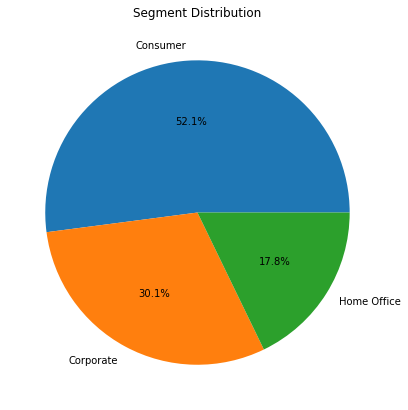

In [64]:
plt.figure(figsize=(15,7))
df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Segment Distribution')
plt.ylabel('')
plt.show()


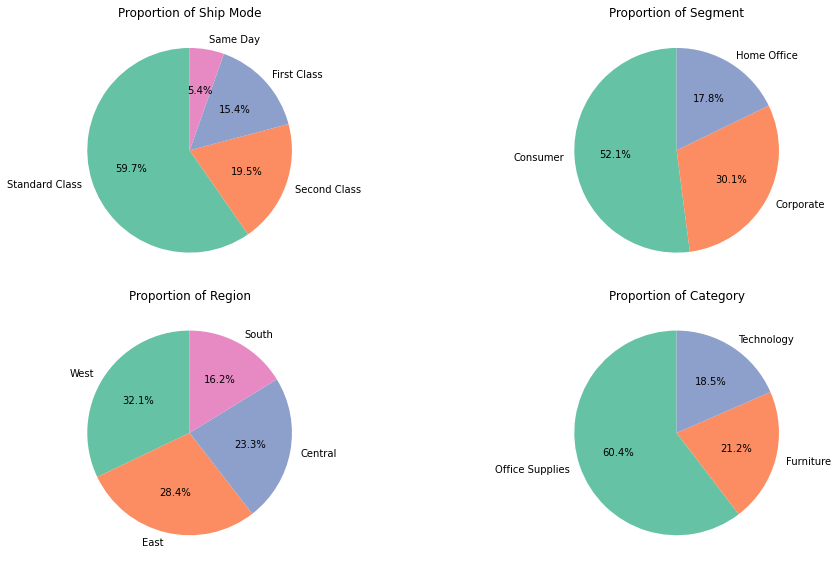

In [65]:

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Pie chart for Ship Mode
axes[0, 0].pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
axes[0, 0].set_title('Proportion of Ship Mode')

# Pie chart for Segment
axes[0, 1].pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
axes[0, 1].set_title('Proportion of Segment')

# Pie chart for Region
axes[1, 0].pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
axes[1, 0].set_title('Proportion of Region')

# Pie chart for Category
axes[1, 1].pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 4))
axes[1, 1].set_title('Proportion of Category')

# Adjust layout to ensure no overlap
plt.tight_layout()

# Show the plot
plt.show()


### 6.2. Bivariate Analysis

#### 6.2.1. Scatter Plot

Sales vs. Profit: To examine how sales impact profit.<br>
Quantity vs. Profit: To see if the quantity sold correlates with profit.<br>
Sales vs. Quantity: To explore the relationship between sales and the number of items sold.<br>

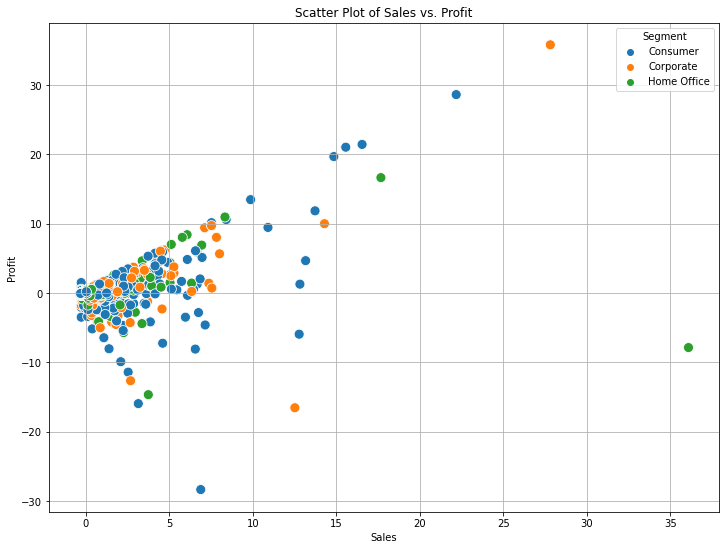

In [66]:
#Sales vs. Profit:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment',s=100)
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid()
plt.show()


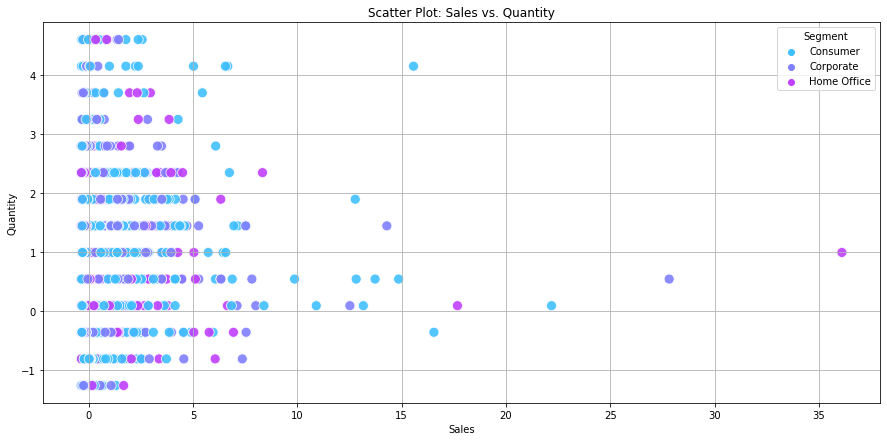

In [67]:
#Sales vs. Quanatity:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='Sales', y='Quantity', hue='Segment', palette='cool', alpha=0.9,s=100)
plt.title('Scatter Plot: Sales vs. Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.grid()
plt.legend(title='Segment')
plt.show()


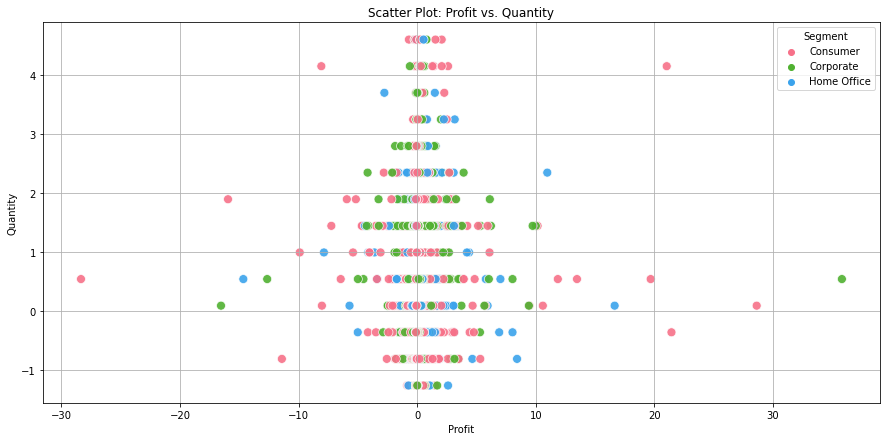

In [68]:
#profit vs Quantity
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='Profit', y='Quantity', hue='Segment', palette='husl', alpha=0.9,s=80)
plt.title('Scatter Plot: Profit vs. Quantity')
plt.xlabel('Profit')
plt.ylabel('Quantity')
plt.grid()
plt.legend(title='Segment')
plt.show()


### 6.2.2. Bar Chart
Suitable Variables:<br>
Segment vs. Profit: To compare average profit across different customer segments.<br>
Ship Mode vs. Sales: To visualize average sales based on shipping methods.<br>
Country/Region vs. Sales: To see total sales by country/region.<br>

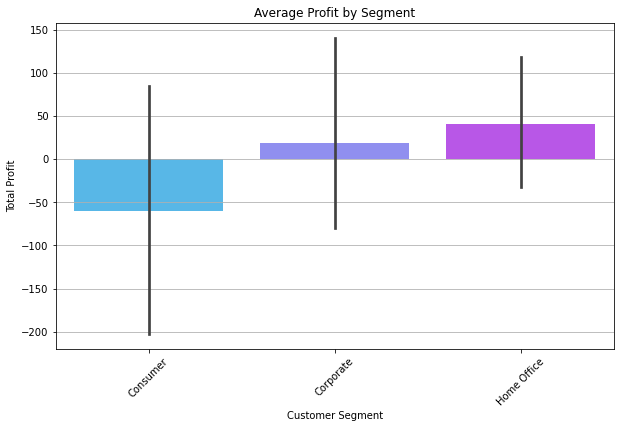

In [69]:
#Segment vs. Profit
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Segment', y='Profit', estimator=sum, palette='cool')
plt.title('Average Profit by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

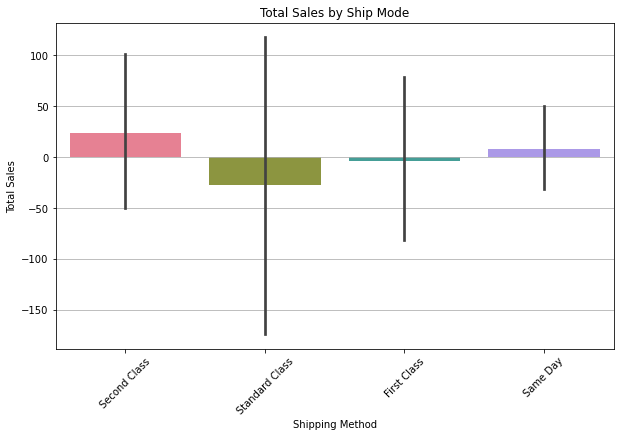

In [70]:
#Ship Mode vs. Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Ship Mode', y='Sales', estimator=sum, palette='husl')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Shipping Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### 6.2.3 stacked bar chart<br>
Stacked bar charts display the total of different categories on top of each other in one bar, allowing you to visualize the composition of each category relative to the total. They are useful for comparing the parts to the whole across different groups.<br>
1. Segment vs. Sales: To compare total sales across different customer segments and visualize the contribution of each segment to total sales.
2. Ship Mode vs. Profit: To see how profit varies among different shipping methods and the contribution of each mode to overall profit.
3. Country/Region vs. Sales: To illustrate how total sales are distributed across different countries or regions.

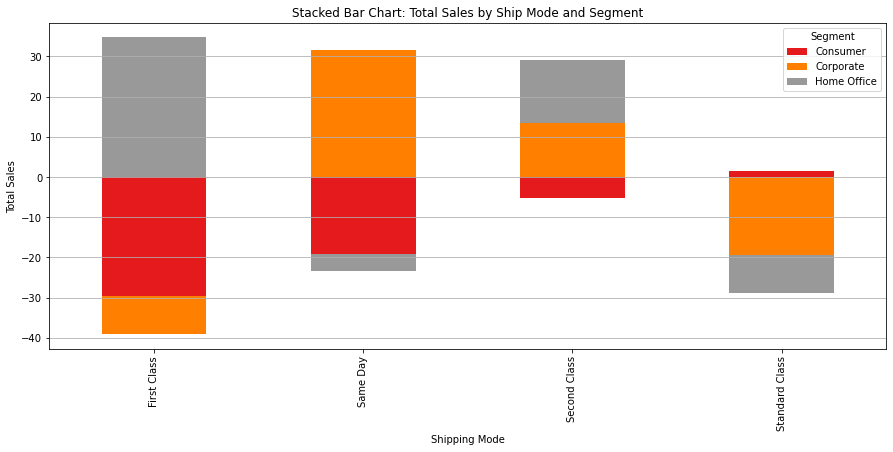

In [71]:
# ship mode vs segmnet
stacked_data = df.groupby(['Ship Mode', 'Segment']).sum()['Sales'].unstack()


stacked_data.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='Set1')
plt.title('Stacked Bar Chart: Total Sales by Ship Mode and Segment')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.legend(title='Segment')
plt.grid(axis='y')
plt.show()


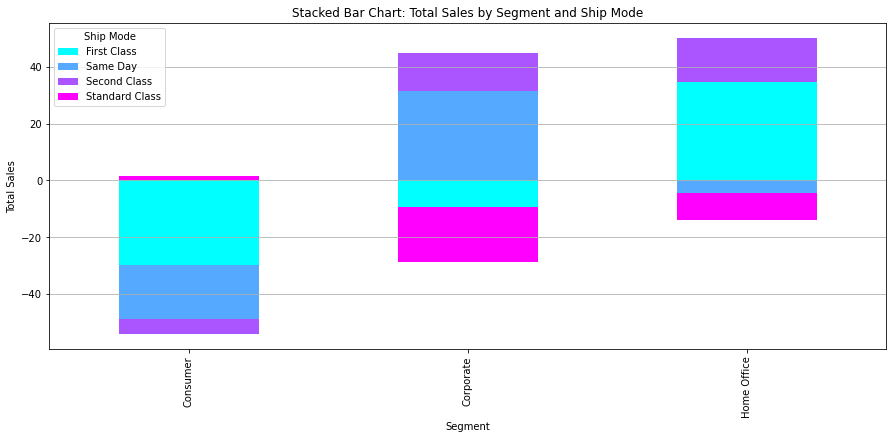

In [72]:
#Segment vs. Sales
sales_segment = df.groupby(['Segment', 'Ship Mode']).sum()['Sales'].unstack()
sales_segment.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='cool')
plt.title('Stacked Bar Chart: Total Sales by Segment and Ship Mode')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.legend(title='Ship Mode')
plt.grid(axis='y')
plt.show()

### 6.2.4 Bivariate Line Charts
Bivariate line charts are useful for visualizing two variables over a continuous domain, such as time<br>


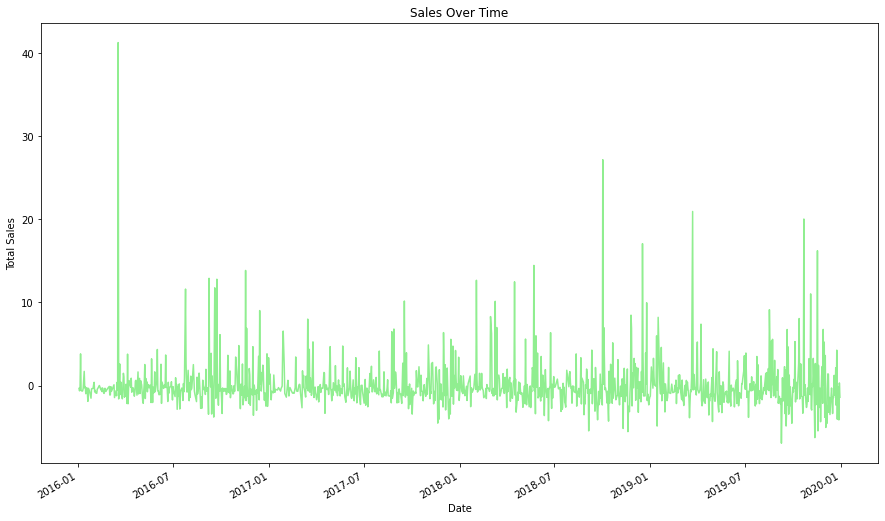

In [73]:
plt.figure(figsize=(15,9))
df.groupby('Order Date')['Sales'].sum().plot(kind='line', color='lightgreen')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()


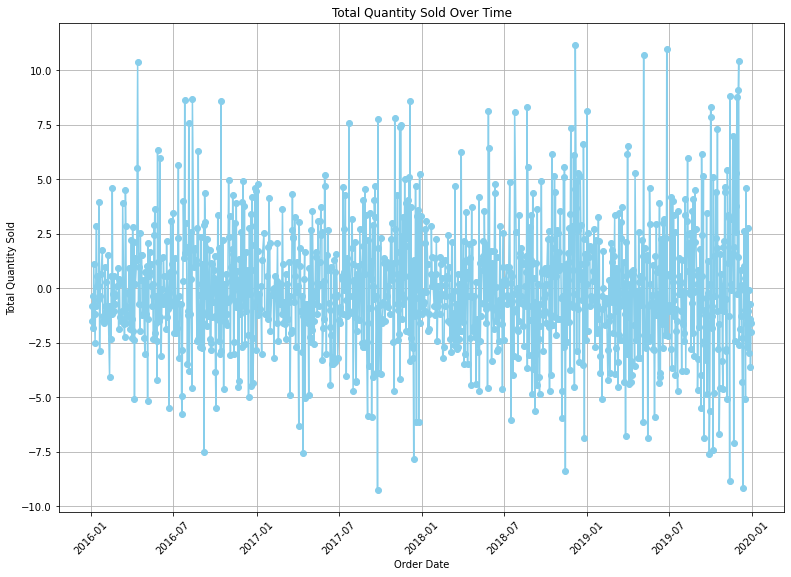

In [74]:
quantity_per_day = df.groupby(df['Order Date'].dt.date)['Quantity'].sum()

plt.figure(figsize=(13, 9))
plt.plot(quantity_per_day.index, quantity_per_day.values, marker='o', color='skyblue', linestyle='-')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 6.3 Multivariate Analysis

#### 6.3.1.Multivariate Box Plot
 Extends box plots by including a third variable through color or facetting.<br>
Suitable Variables:
X-axis: Segment
Y-axis: Profit
Hue: Ship Mode

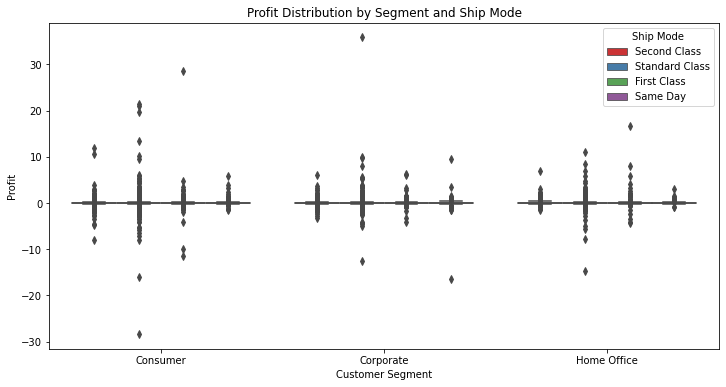

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Segment', y='Profit', hue='Ship Mode', palette='Set1')
plt.title('Profit Distribution by Segment and Ship Mode')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.show()


#### 6.3.2.Pair Plot
Visualizes pairwise relationships in a dataset. Each variable is plotted against each other, and you can include a hue based on a categorical variable.<br>
Suitable Variables:<br>
Numerical Variables: Sales, Profit, Quantity, Discount


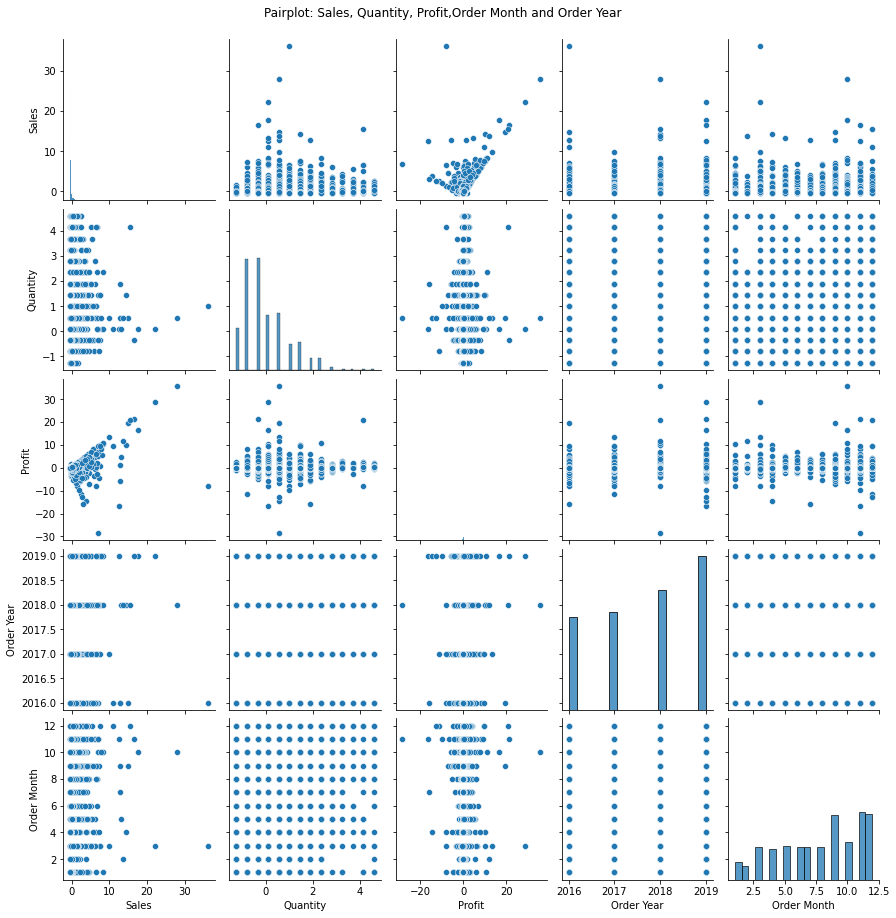

In [76]:

# Pairplot for numerical variables
sns.pairplot(df[['Sales', 'Quantity', 'Profit', 'Order Year','Order Month']])
plt.suptitle('Pairplot: Sales, Quantity, Profit,Order Month and Order Year', y=1.02)
plt.show()

#### 6.3.3. Heatmap with Clustering
 Displays a matrix of values (e.g., correlations) with colors. You can use hierarchical clustering to group similar rows/columns.

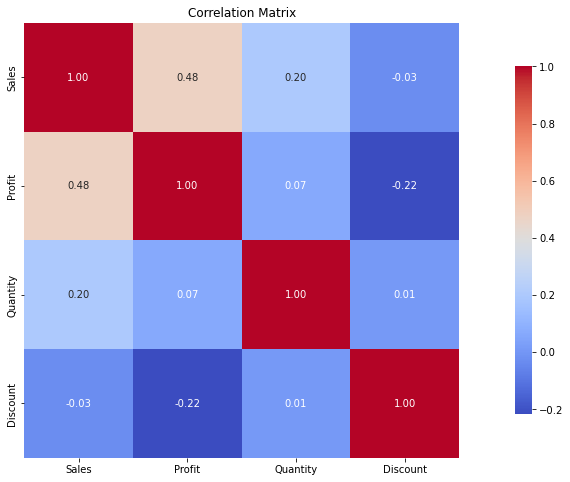

In [77]:
plt.figure(figsize=(20, 8))
correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
#plt.title('Correlation Heatmap with Clustering')
plt.title("Correlation Matrix")
plt.show()


#### 6.3.4. Bubble Plot

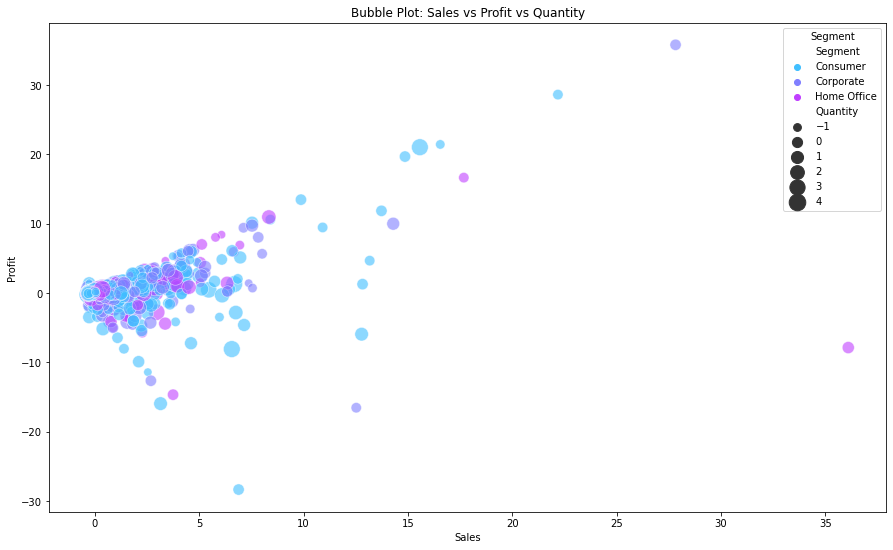

In [78]:

# Bubble plot for Sales vs Profit vs Quantity
plt.figure(figsize=(15, 9))
sns.scatterplot(data=df, x='Sales', y='Profit', size='Quantity', hue='Segment', palette='cool', alpha=0.6, sizes=(50, 300))
plt.title('Bubble Plot: Sales vs Profit vs Quantity')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Segment')
plt.show()


# 7. Customer Segmentation


1. Apply KMeans clustering on the scaled data to segment your customers.
2. Use the Elbow Method to determine the optimal number of clusters.
3. Apply KMeans with the selected number of clusters.
4. Add the predicted cluster labels to the dataframe.
5. Look for the "elbow" point where the inertia starts decreasing at a slower rate. This is usually the optimal number of clusters.

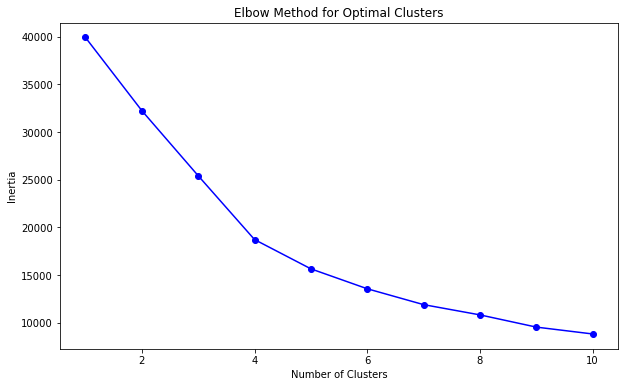

In [79]:

# Selecting numerical features for clustering
numerical_features = ['Sales', 'Quantity', 'Profit', 'Discount']

# Fit KMeans with different number of clusters (1 to 10) to use the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [80]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df[numerical_features])

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,State,Postal Code,...,City_Woodland,City_Woodstock,City_Woonsocket,City_Yonkers,City_York,City_Yucaipa,City_Yuma,Profit_Per_Customer,Avg_Discount,Cluster
0,1,CA-2018-152156,2018-08-22,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,42420.0,...,0,0,0,0,0,0,0,169.9344,0.200000,1
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,42420.0,...,0,0,0,0,0,0,0,169.9344,0.200000,1
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,California,90036.0,...,0,0,0,0,0,0,0,-427.1840,0.172222,1
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,33311.0,...,0,0,0,0,0,0,0,-134.5888,0.136667,3
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,33311.0,...,0,0,0,0,0,0,0,-134.5888,0.136667,1


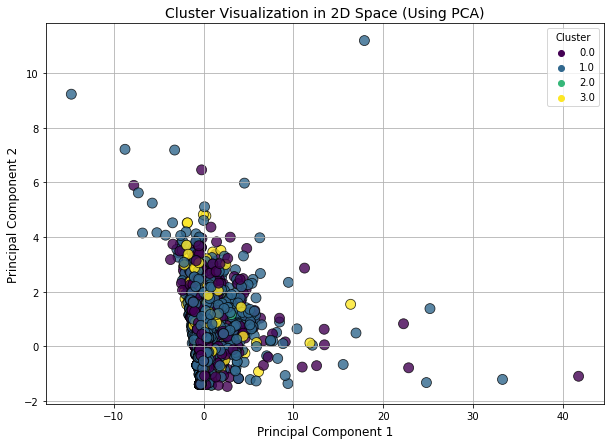

In [81]:

from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[numerical_features])

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='k')

plt.title('Cluster Visualization in 2D Space (Using PCA)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid()
plt.show()


The silhouette score helps to evaluate how well the data points are grouped in each cluster.
It gives a numerical value between -1 and 1:
Close to 1 → Clusters are well-defined and separated.
Close to 0 → Clusters overlap or are ambiguous.
Negative → Misclassification or poor clustering.
Adding this step ensures you validate the clustering method objectively, especially useful for academic or professional projects.

In [82]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score to evaluate cluster quality
silhouette_avg = silhouette_score(df[numerical_features], df['Cluster'])
print(f"Silhouette Score for {kmeans.n_clusters} clusters: {silhouette_avg:.2f}")


Silhouette Score for 4 clusters: 0.43


4.Analyze and profiling Cluster Characteristics
The next step is to understand the characteristics of each cluster. This involves grouping the data by the Cluster column and calculating summary statistics for the key features.
Group by Cluster:

df.groupby('Cluster') groups the dataset by the Cluster labels.
Calculate Summary Statistics:

mean() calculates the average value of numerical features for each cluster, providing insights into the general behavior of data points within each cluster.
Count Data Points:

value_counts() adds the count of data points in each cluster, helping you gauge cluster sizes.
Cluster Characteristics:

The output shows the mean values of features like Sales, Quantity, Profit, and Discount for each cluster, along with the number of points in each cluster.

In [83]:
# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster')[numerical_features].mean()

# Add count of data points in each cluster
cluster_summary['Count'] = df['Cluster'].value_counts()

# Display the cluster summary
print("Cluster Characteristics:")
print(cluster_summary)


Cluster Characteristics:
             Sales  Quantity     Profit  Discount  Count
Cluster                                                 
0         0.280414  1.198542   0.172259 -0.298882   2829
1        -0.162695 -0.564430  -0.029760 -0.282700   6089
2        12.012537  0.627960  11.042009 -0.416573     27
3        -0.122448  0.028142  -0.582689  2.486157   1037


5.interpretation
Cluster 0:
Sales: Slightly above average (0.28)
Quantity: High (1.20)
Profit: Slightly above average (0.17)
Discount: Below average (-0.30)
Interpretation:
Customers in this cluster purchase in high quantities with moderate sales and profit, but they typically receive low discounts. These might be bulk buyers who prefer larger quantities at standard prices.

Cluster 1:
Sales: Slightly below average (-0.16)
Quantity: Low (-0.56)
Profit: Near average (-0.03)
Discount: Below average (-0.28)
Interpretation:
This cluster represents customers with low sales and quantity. Although their profit contribution is close to average, they tend to buy less frequently and may not be as engaged. These could be low-value, casual buyers.

Cluster 2:
Sales: Very high (12.01)
Quantity: Above average (0.63)
Profit: Very high (11.04)
Discount: Significantly below average (-0.42)
Interpretation:
This is a small group of premium, high-value customers who generate the majority of sales and profit while taking very few discounts. These are your top-tier loyal customers or big-ticket purchasers.

Cluster 3:
Sales: Below average (-0.12)
Quantity: Near average (0.03)
Profit: Low (-0.58)
Discount: Very high (2.49)
Interpretation:
Customers in this cluster make low sales and profit contributions but enjoy high discounts. These might be price-sensitive customers who only buy during promotions or discounts. They could also represent at-risk customers who might churn if discounts are reduced

Additional Cluster Analysis with Boxplots
Boxplots provide a detailed view of how each feature (e.g., Sales, Quantity) varies across clusters.
This visual representation:
Shows the range, quartiles, and outliers for each feature.
Helps interpret characteristics of each cluster more intuitively.
Adding gridlines (plt.grid) and vibrant colors (palette='Set2') enhances readability and aesthetics.

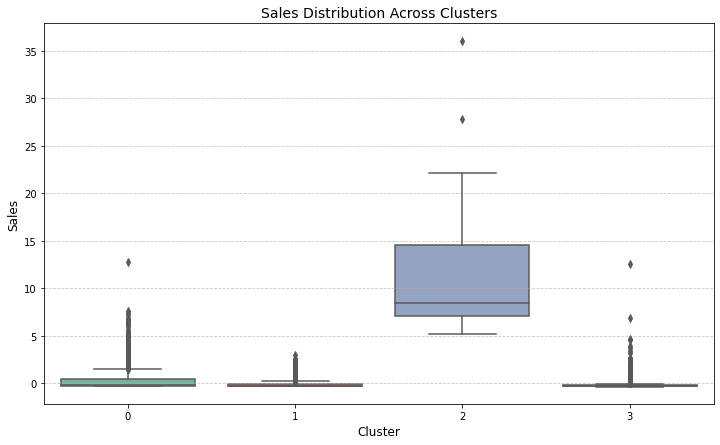

In [84]:
# Boxplot for sales distribution across clusters
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Cluster', y='Sales', palette='Set2')
plt.title('Sales Distribution Across Clusters', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Insights:

 ### 1.Customer Segmentation Insights

 <b>Cluster 0 (High Sales, High Quantity):</b>Customers in this segment are likely high-value buyers who make frequent purchases at high volumes. They are important for the business.<br>

 <b>Cluster 1 (Low Sales, Low Quantity, Low Profit):</b> This segment may consist of less engaged customers with low purchase frequency and low order values. They may be at risk of churn.<br>

  <b>Cluster 2 (High Profit, Low Quantity, High Discount):</b> Customers in this cluster purchase in smaller quantities but contribute significantly to profit. The high discounts indicate that they may respond to promotional campaigns.<br>

  <b>Cluster 3 (Low Sales, High Discount, Low Profit):</b> This segment may represent price-sensitive customers who take advantage of discounts but don’t contribute significantly to profits.<br>
  
    #### High-value clusters --- Cluster 0 and Cluster 2
    #### Low-value clusters  --- Cluster 1 and Cluster 3






### 2.Sales Pattern Analysis
1. December 2019 has highest count of orders.
2. January 2016 has generated highest revenue of sales.
3. Top States generating highest revenue - California,New York,Texas.
4. Top States generating highest revenue belongs to west region.
5. Highest number of forders are from consumer segment.
6. Customers preferring Standard class mode of shipping not first day or second day shipping.
7. Top Products generating revenue is related to staples- staple Envelops,Staples, Staple-belongs to Home office Segment.
8. More profit and quantity - Consumer Segment.
9. Average Profit in Segments is highest for Homeoofice segement because of using standard class shipping.
10. Higher discounts lead to less profit.


# Recommendations


1. <b>High-value clusters</b> - should receive personalized offers and loyalty rewards to maintain their purchasing behavior.
<br><br>
2. <b>Low-value clusters </b> - might benefit from re-engagement efforts, targeted promotions, or bundles to increase their purchase frequency and overall value.
<br><br>
3. <b>Customer Retention: </b>Efforts to improve the retention of customers in Cluster 1 are crucial, as they represent a segment with high potential for growth if appropriately nurtured. Identifying and understanding their needs can turn them into profitable customers.
<br><br>
4. <b>Product Strategy: </b>The product offerings should be tailored to match the purchasing behavior of each cluster. For example, high-profit clusters (Cluster 2) could benefit from premium or exclusive products, while low-profit clusters (Cluster3) may need more basic, cost-effective options.



# Conclusion

Customer segmentation provides valuable insights into the diversity of customer behavior within your data. With the clusters identified, businesses can make informed decisions on marketing, product offerings, and customer engagement strategies that maximize revenue and improve customer satisfaction. By continuing to monitor and refine these segments, businesses can adapt to changes in customer behavior and stay competitive in the market.